# Project 3

## Part 1

Please implement

* **HITS** and **PageRank** (Lecture 7, P37, random jumping probability, i.e., damping factor=0.15) and calculate authority, hub and PageRank values for the following 8 graphs
    * 6 graphs in project3dataset
    * 1 graphs from project1 transaction data (connect items in each row, bi-directed or directed)
* **SimRank** to calculate pair-wise similarity of nodes (choice any parameter C you like) , using
    * first 5 graphs of project3dataset.

project3dataset

* graph_1.txt: 6 nodes, 5 edges
* graph_2.txt: 5 nodes, 5 edges (a circle)
* graph_3.txt: 4 nodes, 6 edges
* graph_4.txt: 7 nodes, 18 edges (the example in Lecture3, p29)
* graph_5.txt:  469 nodes, 1102 edges
* graph_6.txt: 1228 nodes, 5220 edges

In [1]:
import numpy as np
import matplotlib.pyplot as plt
# import pandas as pd

In [2]:
# Determine the way floating point numbers, arrays and other NumPy objects are displayed.
np.set_printoptions(precision=4)

In [3]:
inputfile = open('hw3dataset/data_2_3_5_3_5.data', 'r')

In [4]:
outputfile = open('hw3dataset/graph_7.txt', 'w')

In [5]:
# outputfile = open('hw3dataset/data_2_3_5_3_5.csv', 'w')
# outputfile.write('CustID,TransID,Item\n')

In [6]:
while True:
    s = inputfile.readline().rstrip('\n')
    
    # if this is the eof
    if len(s) == 0:
        break
        
    # Extract dimensions from first line. Cast values to integers from strings.
    CustID, TransID, Item = (int(val) for val in s.split())
    # output_str = '%d,%d,%d\n' % (CustID, TransID, Item)
    output_str = '%d,%d\n' % (TransID, Item)
    outputfile.write(output_str)

In [7]:
inputfile.close()
outputfile.close()

In [8]:
# df = pd.read_csv('hw3dataset/data_2_3_5_3_5.csv')

In [9]:
# df.describe()

In [10]:
NUM_OF_G1 = 6
NUM_OF_G2 = 5
NUM_OF_G3 = 4
NUM_OF_G4 = 7
NUM_OF_G5 = 469
NUM_OF_G6 = 1228
NUM_OF_G7 = 4995
NUM_OF_G8 = 7
NUM_OF_G9 = 5

In [11]:
graph1 = np.zeros((NUM_OF_G1, NUM_OF_G1), dtype=int)
with open('hw3dataset/graph_1.txt', 'r') as f:
    for line in f.readlines():
        node1, node2 = line.split(',')
        node1, node2 = int(node1), int(node2)
        node1, node2 = node1 - 1, node2 - 1
        graph1[node1, node2] += 1

In [12]:
graph2 = np.zeros((NUM_OF_G2, NUM_OF_G2), dtype=int)
with open('hw3dataset/graph_2.txt', 'r') as f:
    for line in f.readlines():
        node1, node2 = line.split(',')
        node1, node2 = int(node1), int(node2)
        node1, node2 = node1 - 1, node2 - 1
        graph2[node1, node2] += 1

In [13]:
graph3 = np.zeros((NUM_OF_G3, NUM_OF_G3), dtype=int)
with open('hw3dataset/graph_3.txt', 'r') as f:
    for line in f.readlines():
        node1, node2 = line.split(',')
        node1, node2 = int(node1), int(node2)
        node1, node2 = node1 - 1, node2 - 1
        graph3[node1, node2] += 1

In [14]:
graph4 = np.zeros((NUM_OF_G4, NUM_OF_G4), dtype=int)
with open('hw3dataset/graph_4.txt', 'r') as f:
    for line in f.readlines():
        node1, node2 = line.split(',')
        node1, node2 = int(node1), int(node2)
        node1, node2 = node1 - 1, node2 - 1
        graph4[node1, node2] += 1

In [15]:
graph5 = np.zeros((NUM_OF_G5, NUM_OF_G5), dtype=int)
with open('hw3dataset/graph_5.txt', 'r') as f:
    for line in f.readlines():
        node1, node2 = line.split(',')
        node1, node2 = int(node1), int(node2)
        node1, node2 = node1 - 1, node2 - 1
        graph5[node1, node2] += 1

In [16]:
graph6 = np.zeros((NUM_OF_G6, NUM_OF_G6), dtype=int)
with open('hw3dataset/graph_6.txt', 'r') as f:
    for line in f.readlines():
        node1, node2 = line.split(',')
        node1, node2 = int(node1), int(node2)
        node1, node2 = node1 - 1, node2 - 1
        graph6[node1, node2] += 1

In [17]:
graph7 = np.zeros((NUM_OF_G7, NUM_OF_G7), dtype=int)
with open('hw3dataset/graph_7.txt', 'r') as f:
    for line in f.readlines():
        node1, node2 = line.split(',')
        node1, node2 = int(node1), int(node2)
        node1, node2 = node1 - 1, node2 - 1
        graph7[node1, node2] += 1

In [18]:
graph8 = np.zeros((NUM_OF_G8, NUM_OF_G8), dtype=int)
with open('hw3dataset/graph_8.txt', 'r') as f:
    for line in f.readlines():
        node1, node2 = line.split(',')
        node1, node2 = int(node1), int(node2)
        node1, node2 = node1 - 1, node2 - 1
        graph8[node1, node2] += 1

In [19]:
graph9 = np.zeros((NUM_OF_G9, NUM_OF_G9), dtype=int)
with open('hw3dataset/graph_9.txt', 'r') as f:
    for line in f.readlines():
        node1, node2 = line.split(',')
        node1, node2 = int(node1), int(node2)
        node1, node2 = node1 - 1, node2 - 1
        graph9[node1, node2] += 1

In [20]:
def HubsAuthorities(graph, epsilon=1e-4):
    row, col = graph.shape
    pre_ath = pre_hub = np.ones(row)
    epsilon_matrix = epsilon * np.ones(row)
    while True:
        ath = np.dot(pre_hub, graph)    # Sum of parents' hubs
        hub = np.dot(pre_ath, graph.T)  # Sum of children's authorities
        ath_nor = ath.max()
        hub_nor = hub.max()
        if ath_nor != 0:
            ath /= ath_nor
        if hub_nor != 0:
            hub /= hub_nor
        if (((abs(hub - pre_hub)) < epsilon_matrix).all()) and (((abs(ath - pre_ath)) < epsilon_matrix).all()):
            break
        pre_ath = ath
        pre_hub = hub
    return ath, hub

In [21]:
authority, hub = HubsAuthorities(graph1)
print(authority)
print(hub)

[0. 1. 1. 1. 1. 1.]
[1. 1. 1. 1. 1. 0.]


In [22]:
authority, hub = HubsAuthorities(graph2)
print(authority)
print(hub)

[1. 1. 1. 1. 1.]
[1. 1. 1. 1. 1.]


In [23]:
authority, hub = HubsAuthorities(graph3)
print(authority)
print(hub)

[0.6181 1.     1.     0.6181]
[0.6181 1.     1.     0.6181]


In [24]:
authority, hub = HubsAuthorities(graph4)
print(authority)
print(hub)

[0.6926 0.8833 0.997  0.696  1.     0.2785 0.4175]
[1.     0.1734 0.3946 0.7212 0.6671 0.4238 0.2504]


In [25]:
authority, hub = HubsAuthorities(graph5)
print(authority)
print(hub)

[0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00 3.6172e-11
 1.9588e-06 4.9515e-10 7.8766e-16 7.8766e-16 4.9515e-10 1.9588e-06
 7.8766e-16 7.8766e-16 1.9588e-06 1.5336e-02 2.0397e-09 5.1432e-02
 1.8707e-10 6.4324e-08 7.5889e-07 8.9871e-07 6.4324e-08 1.0966e-06
 3.5127e-02 3.8881e-11 3.5952e-11 2.0397e-09 2.0397e-09 3.0768e-18
 1.1596e-10 1.9925e-10 3.0768e-18 7.8855e-17 1.7533e-06 1.3843e-02
 2.5698e-02 2.7324e-02 6.4324e-08 6.6491e-06 2.0397e-09 6.4324e-08
 5.7805e-06 8.8659e-06 2.0397e-09 2.0133e-05 2.7846e-11 3.1955e-02
 1.5336e-02 5.2473e-02 1.5336e-02 1.9925e-10 2.0164e-13 1.3843e-02
 8.9132e-02 2.0097e-02 3.9466e-10 3.5761e-02 2.0412e-10 1.4246e-05
 1.0000e+00 3.9466e-10 3.2610e-10 2.0397e-09 5.1527e-12 2.0164e-13
 6.4324e-08 1.6580e-02 5.1620e-11 1.0457e-06 7.9548e-07 7.8855e-17
 3.7906e-10 2.0164e-13 2.7324e-02 2.0397e-09 2.0164e-13 2.7324e-02
 1.9285e-02 2.0164e-13 8.9132e-02 6.4324e-08 6.4324e-08 6.1931e-06
 3.6676e-02 2.0412e-10 2.0164e-13 6.2757e-02 2.7985e-06 1.4960

In [26]:
authority, hub = HubsAuthorities(graph6)
print(authority)
print(hub)

[0.0000e+00 2.9685e-02 1.7024e-28 ... 4.9559e-03 4.4904e-01 3.8787e-28]
[0.1669 0.     0.     ... 0.     0.6028 0.    ]


In [27]:
authority, hub = HubsAuthorities(graph7)
print(authority)
print(hub)

[0.     0.     0.     ... 0.     0.     0.9803]
[0.8738 0.0318 0.7208 ... 0.     0.     0.    ]


In [28]:
def PageRank(graph, d=0.15, epsilon=0.0001):
    row, col = graph.shape
    L = []
    p = []
    c = []
    for i in range(row):
        L.append(np.nonzero(graph[:, i])[0])      # Get node i's parents
        children = np.nonzero(graph[i, :])[0]     # Get node i's children
        p.append(L[i].shape[0])                   # Number of node i's parents
        c.append(children.shape[0])               # Number of node i's children
    c = np.array(c)
    delta = d / row                               # d: damping factor
    x = np.ones(row) / row
    z = np.zeros(row)
    while max(abs(x - z)) > epsilon:
        z = x
        x = np.zeros(row)
        for i in range(row):
            if p[i] != 0:                         # If node i has at least one parent
                x[i] = np.sum(z[L[i]] / c[L[i]])   
        x = delta + (1 - d) * x
    return x 

In [29]:
PageRank(graph1)

array([0.025 , 0.0462, 0.0643, 0.0797, 0.0927, 0.1038])

In [30]:
PageRank(graph2)

array([0.2, 0.2, 0.2, 0.2, 0.2])

In [31]:
PageRank(graph3)

array([0.1755, 0.3245, 0.3245, 0.1755])

In [32]:
PageRank(graph4)

array([0.2803, 0.1588, 0.1389, 0.1082, 0.1842, 0.0606, 0.0691])

In [33]:
PageRank(graph5)

array([0.0003, 0.0003, 0.0003, 0.0003, 0.0003, 0.0004, 0.0003, 0.0004,
       0.0004, 0.0004, 0.0004, 0.0003, 0.0004, 0.0004, 0.0003, 0.0003,
       0.0003, 0.0004, 0.0004, 0.0003, 0.0008, 0.0008, 0.0003, 0.0009,
       0.0004, 0.0004, 0.0004, 0.0003, 0.0003, 0.0005, 0.0004, 0.0003,
       0.0005, 0.0004, 0.0005, 0.0004, 0.0004, 0.0003, 0.0003, 0.0008,
       0.0003, 0.0003, 0.0008, 0.001 , 0.0003, 0.0005, 0.0004, 0.0004,
       0.0003, 0.0004, 0.0003, 0.0003, 0.0004, 0.0004, 0.0004, 0.0003,
       0.0003, 0.0004, 0.0003, 0.0005, 0.0029, 0.0003, 0.0005, 0.0003,
       0.0004, 0.0004, 0.0003, 0.0003, 0.0003, 0.0005, 0.0004, 0.0004,
       0.0003, 0.0004, 0.0003, 0.0003, 0.0004, 0.0003, 0.0003, 0.0004,
       0.0004, 0.0003, 0.0003, 0.0004, 0.0004, 0.0003, 0.0004, 0.0004,
       0.0004, 0.0004, 0.0003, 0.0006, 0.0003, 0.0009, 0.0003, 0.0012,
       0.0004, 0.0003, 0.0004, 0.0003, 0.0003, 0.0003, 0.0003, 0.0021,
       0.0005, 0.0004, 0.0003, 0.0003, 0.0005, 0.0003, 0.0003, 0.0003,
      

In [34]:
PageRank(graph6)

array([0.0001, 0.0001, 0.0001, ..., 0.0001, 0.0004, 0.0001])

In [35]:
PageRank(graph7)

array([3.0030e-05, 3.0030e-05, 3.0030e-05, ..., 3.0030e-05, 3.0030e-05,
       3.2609e-03])

In [36]:
def SimRank(graph, C=0.6, K=5):
    '''
    Args:
        gragh: adjacency matrix
        C: dacay factor
        K: num of iteration
    Return:
        SimRank
    '''
    row, col = graph.shape
    s = np.identity(row)     # Init SimRank
    parents = []             # Parents of each node
    p = []                   # Num of parents of each node
    for i in range(row):
        tmp = np.nonzero(graph[:, i])[0]
        parents.append(tmp)
        p.append(tmp.shape[0])
    
    for k in range(K):
        new_s = np.zeros((row, col))          # New SimRank for new iteration
        for a in range(row):
            for b in range(col):
                if a == b:                    # s(a, a) = 1
                    new_s[a, b] = 1
                    continue
                if p[a] == 0 or p[b] == 0:    # Either a or b has no parent, s(a, b) = 0
                    new_s[a, b] = 0
                    continue
                tmp = 0
                for i in range(p[a]):
                    for j in range(p[b]):
                        tmp += s[parents[a][i], parents[b][j]]
                new_s[a, b] = C / (p[a] * p[b]) * tmp
        s = new_s                             # Overwrite s
    return s

In [37]:
SimRank(graph1)

array([[1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 1.]])

In [38]:
SimRank(graph2)

array([[1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1.]])

In [39]:
SimRank(graph3)

array([[1.    , 0.    , 0.4275, 0.    ],
       [0.    , 1.    , 0.    , 0.4275],
       [0.4275, 0.    , 1.    , 0.    ],
       [0.    , 0.4275, 0.    , 1.    ]])

In [40]:
SimRank(graph4)

array([[1.    , 0.1599, 0.1512, 0.1589, 0.1411, 0.2205, 0.0974],
       [0.1599, 1.    , 0.2114, 0.1766, 0.2092, 0.0936, 0.2596],
       [0.1512, 0.2114, 1.    , 0.2568, 0.1928, 0.2562, 0.2575],
       [0.1589, 0.1766, 0.2568, 1.    , 0.1523, 0.3405, 0.3405],
       [0.1411, 0.2092, 0.1928, 0.1523, 1.    , 0.0859, 0.2187],
       [0.2205, 0.0936, 0.2562, 0.3405, 0.0859, 1.    , 0.081 ],
       [0.0974, 0.2596, 0.2575, 0.3405, 0.2187, 0.081 , 1.    ]])

In [41]:
# np.set_printoptions(threshold=np.inf)

In [42]:
SimRank(graph5)

array([[1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 1.]])

In [43]:
# tmp = SimRank(graph5)

In [44]:
# print(tmp)

In [45]:
# np.sort(tmp)

In [46]:
# np.where(tmp == 0.6)

## Part 2

Find a way (e.g., add/delete some links) to increase hub, authority, and PageRank of Node 1 in first 3 graphs respectively.

### Graph 1

In [47]:
print(graph1)

o_authority, o_hub = HubsAuthorities(graph1)
print(o_authority)
print(o_hub)
print(PageRank(graph1))

[[0 1 0 0 0 0]
 [0 0 1 0 0 0]
 [0 0 0 1 0 0]
 [0 0 0 0 1 0]
 [0 0 0 0 0 1]
 [0 0 0 0 0 0]]
[0. 1. 1. 1. 1. 1.]
[1. 1. 1. 1. 1. 0.]
[0.025  0.0462 0.0643 0.0797 0.0927 0.1038]


#### Increase Hub of Node 1

In [48]:
graph1_v2 = np.copy(graph1)
graph1_v2[0, 4] = 1
print(graph1_v2)

authority, hub = HubsAuthorities(graph1_v2)
print('Original Hub      :', o_hub)
print('New      Hub      :', hub)
print('Original Authority:', o_authority)
print('New      Authority:', authority)

[[0 1 0 0 1 0]
 [0 0 1 0 0 0]
 [0 0 0 1 0 0]
 [0 0 0 0 1 0]
 [0 0 0 0 0 1]
 [0 0 0 0 0 0]]
Original Hub      : [1. 1. 1. 1. 1. 0.]
New      Hub      : [1.0000e+00 1.4782e-04 1.4782e-04 6.1803e-01 1.4782e-04 0.0000e+00]
Original Authority: [0. 1. 1. 1. 1. 1.]
New      Authority: [0.0000e+00 6.1803e-01 1.4782e-04 1.4782e-04 1.0000e+00 1.4782e-04]


#### Increase Authority of Node 1

In [49]:
graph1_v3 = np.copy(graph1)
graph1_v3[5, 0] = 1
print(graph1_v3)

authority, hub = HubsAuthorities(graph1_v3)
print('Original Hub      :', o_hub)
print('New      Hub      :', hub)
print('Original Authority:', o_authority)
print('New      Authority:', authority)

[[0 1 0 0 0 0]
 [0 0 1 0 0 0]
 [0 0 0 1 0 0]
 [0 0 0 0 1 0]
 [0 0 0 0 0 1]
 [1 0 0 0 0 0]]
Original Hub      : [1. 1. 1. 1. 1. 0.]
New      Hub      : [1. 1. 1. 1. 1. 1.]
Original Authority: [0. 1. 1. 1. 1. 1.]
New      Authority: [1. 1. 1. 1. 1. 1.]


#### Increase PageRank of Node 1

In [50]:
graph1_v4 = np.copy(graph1)
graph1_v4[5, 0] = 1
# graph1_v4[4, 0] = 1
# graph1_v4[3, 0] = 1
# graph1_v4[2, 0] = 1
# graph1_v4[1, 0] = 1
print(graph1_v4)

print('Original PageRank:', PageRank(graph1))
print('New      PageRank:', PageRank(graph1_v4))

[[0 1 0 0 0 0]
 [0 0 1 0 0 0]
 [0 0 0 1 0 0]
 [0 0 0 0 1 0]
 [0 0 0 0 0 1]
 [1 0 0 0 0 0]]
Original PageRank: [0.025  0.0462 0.0643 0.0797 0.0927 0.1038]
New      PageRank: [0.1667 0.1667 0.1667 0.1667 0.1667 0.1667]


### Graph 2

In [51]:
print(graph2)

o_authority, o_hub = HubsAuthorities(graph2)
print(o_authority)
print(o_hub)
print(PageRank(graph2))

[[0 1 0 0 0]
 [0 0 1 0 0]
 [0 0 0 1 0]
 [0 0 0 0 1]
 [1 0 0 0 0]]
[1. 1. 1. 1. 1.]
[1. 1. 1. 1. 1.]
[0.2 0.2 0.2 0.2 0.2]


#### Increase Hub of Node 1

In [52]:
graph2_v2 = np.copy(graph2)
graph2_v2[0, 2] = 1
print(graph2_v2)

authority, hub = HubsAuthorities(graph2_v2)
print('Original Hub      :', o_hub)
print('New      Hub      :', hub)
print('Original Authority:', o_authority)
print('New      Authority:', authority)

[[0 1 1 0 0]
 [0 0 1 0 0]
 [0 0 0 1 0]
 [0 0 0 0 1]
 [1 0 0 0 0]]
Original Hub      : [1. 1. 1. 1. 1.]
New      Hub      : [1.0000e+00 6.1803e-01 1.4782e-04 1.4782e-04 1.4782e-04]
Original Authority: [1. 1. 1. 1. 1.]
New      Authority: [1.4782e-04 6.1803e-01 1.0000e+00 1.4782e-04 1.4782e-04]


#### Increase Authority of Node 1

In [53]:
graph2_v3 = np.copy(graph2)
graph2_v3[2, 0] = 1
print(graph2_v3)

authority, hub = HubsAuthorities(graph2_v3)
print('Original Hub      :', o_hub)
print('New      Hub      :', hub)
print('Original Authority:', o_authority)
print('New      Authority:', authority)

[[0 1 0 0 0]
 [0 0 1 0 0]
 [1 0 0 1 0]
 [0 0 0 0 1]
 [1 0 0 0 0]]
Original Hub      : [1. 1. 1. 1. 1.]
New      Hub      : [1.4782e-04 1.4782e-04 1.0000e+00 1.4782e-04 6.1803e-01]
Original Authority: [1. 1. 1. 1. 1.]
New      Authority: [1.0000e+00 1.4782e-04 1.4782e-04 6.1803e-01 1.4782e-04]


#### Increase PageRank of Node 1

In [54]:
graph2_v4 = np.copy(graph2)
graph2_v4[1, 0] = 1
print(graph2_v4)

print('Original PageRank:', PageRank(graph2))
print('New      PageRank:', PageRank(graph2_v4))

[[0 1 0 0 0]
 [1 0 1 0 0]
 [0 0 0 1 0]
 [0 0 0 0 1]
 [1 0 0 0 0]]
Original PageRank: [0.2 0.2 0.2 0.2 0.2]
New      PageRank: [0.2787 0.2669 0.1434 0.1519 0.1591]


### Graph 3

In [55]:
print(graph3)

o_authority, o_hub = HubsAuthorities(graph3)
print(o_authority)
print(o_hub)
print(PageRank(graph3))

[[0 1 0 0]
 [1 0 1 0]
 [0 1 0 1]
 [0 0 1 0]]
[0.6181 1.     1.     0.6181]
[0.6181 1.     1.     0.6181]
[0.1755 0.3245 0.3245 0.1755]


#### Increase Hub of Node 1

In [56]:
graph3_v2 = np.copy(graph3)
graph3_v2[0, 2] = 1
print(graph3_v2)

authority, hub = HubsAuthorities(graph3_v2)
print('Original Hub      :', o_hub)
print('New      Hub      :', hub)
print('Original Authority:', o_authority)
print('New      Authority:', authority)

[[0 1 1 0]
 [1 0 1 0]
 [0 1 0 1]
 [0 0 1 0]]
Original Hub      : [0.6181 1.     1.     0.6181]
New      Hub      : [1.     0.8271 0.5112 0.618 ]
Original Authority: [0.6181 1.     1.     0.6181]
New      Authority: [0.3382 0.6181 1.     0.2091]


#### Increase Authority of Node 1

In [57]:
graph3_v3 = np.copy(graph3)
graph3_v3[2, 0] = 1
print(graph3_v2)

authority, hub = HubsAuthorities(graph3_v3)
print('Original Hub      :', o_hub)
print('New      Hub      :', hub)
print('Original Authority:', o_authority)
print('New      Authority:', authority)

[[0 1 1 0]
 [1 0 1 0]
 [0 1 0 1]
 [0 0 1 0]]
Original Hub      : [0.6181 1.     1.     0.6181]
New      Hub      : [0.3382 0.6181 1.     0.2091]
Original Authority: [0.6181 1.     1.     0.6181]
New      Authority: [1.     0.8271 0.5112 0.618 ]


#### Increase PageRank of Node 1

In [58]:
graph3_v4 = np.copy(graph3)
graph3_v4[2, 0] = 1
print(graph3_v4)

print('Original PageRank:', PageRank(graph3))
print('New      PageRank:', PageRank(graph3_v4))

[[0 1 0 0]
 [1 0 1 0]
 [1 1 0 1]
 [0 0 1 0]]
Original PageRank: [0.1755 0.3245 0.3245 0.1755]
New      PageRank: [0.2616 0.3396 0.2815 0.1173]


## Part 3

Please describe and analysis your results for each algorithm in each graph.

### Graph 1
graph1 因為是從 node1 串接到 node6，所以各點的 PageRank 值是從 node1 一路遞增到 node6。而因為 node2~node5 都各有一個 parent 和一個 child，所以這四個點的 hub, authority 都相同。又因為沒有點有共同的 parent，所以 SimRank 除了自己跟自己是 1 以外，其他都是 0。

### Graph 2
graph2 是五個點連成的圈，所以 hub, authority, PageRank 都相同。跟 graph1 一樣都沒有點有共同的 parent，所以 SimRank 除了自己跟自己是 1 以外，其他都是 0。

### Graph 3
graph3 裡的 node1, 4 對稱，node2, 3 對稱。對稱的點有相同的 hub, authority, PageRank。而因為 node2, 3 連到較多的點，所以這兩點的  hub, authority, PageRank 值都比 node1, 4 還大。<br/>
node1, 3 有共同的 parent (i.e. node2)，node2, 4 則有共同的 parent (i.e. node3)，所以這兩組的 SimRank 較高。

### Graph 4
graph4 各點連結情形如下：

| Node| Out-Link| In-Link|
| --- | ------- | ------ |
| 1   | 2, 3, 4, 5, 7| 2, 3, 5, 6|
| 2   | 1| 1, 3, 4|
| 3   | 1, 2| 1, 4, 5|
| 4   | 2, 3, 5| 1, 5|
| 5   | 1, 3, 4, 6| 1, 4, 6, 7|
| 6   | 1, 5| 5|
| 7   | 5| 1|

各點之 hub, authority, PageRank 排序如下

```
Hub 1 > 4 > 5 > 6 > 3 > 7 > 2
Aut 5 > 3 > 2 > 4 > 1 > 7 > 6 
PR  1 > 5 > 2 > 3 > 4 > 7 > 6
```

Authority 最大的是 node5，所以 in-link 沒有 node5 的 node2 的 hub 最小。而 node1 的 in-link 則囊括了幾個 authority 最大的 node5, 3, 2，所以 hub 最大。node5, 3, 2 的 out-link 都有 node1, 4 這兩個 hub 最大的點，所以他們的 authority 最大。
node1, 5 雖然有相同個數的 in-link，但 node2, 3 的 children都很少，而 node1, 4 的 children則很多，造成 node5 的 PangRank 比較低。 <br/>
SimRank 最大的是 node4, 6 與 node4, 7。原因是他們的 in-link 都不多。node4的 in-link 有 node1, 5，其中一個是 node6 的 in-link，另一個是 node7 的 in-link。

In [59]:
authority, hub = HubsAuthorities(graph4)
print(hub)
print(authority)

[1.     0.1734 0.3946 0.7212 0.6671 0.4238 0.2504]
[0.6926 0.8833 0.997  0.696  1.     0.2785 0.4175]


### Graph 5
graph5 當中 hub, authority, PageRank 最大的前 10 點如下所示：

In [60]:
authority, hub = HubsAuthorities(graph5)
np.argsort(-hub)[:10] + 1

array([274, 176, 412, 293, 254, 325, 115, 182,  37, 450])

In [61]:
np.argsort(-authority)[:10] + 1

array([ 61, 122, 212, 104, 282, 185, 348, 325, 148, 134])

In [62]:
np.argsort(-PageRank(graph5))[:10] + 1

array([ 61, 122, 104, 212, 282, 185, 325, 348,  96, 148])

authority 和 PageRank 前幾大的點有高的重疊性，通常是 in-degree 很大的點。而 hub 值很大的點則通常是 out-degree 很大的點，但也不是 out-degree 愈大愈好，與還是與該點指向哪個點有關。以下列出 hub, authority, PageRank 最大的前 3 點他們的 out-degree 和 in-degree：

| Node| Out-Degree| In-Degree|
| --- | --------- | -------- |
| 61  | 0         | 48
| 104 | 0         | 27
| 122 | 0         | 47
| 176 | 9         | 1
| 212 | 6         | 25
| 274 | 12        | 1
| 412 | 38        | 4

graph5 當中除了 1 最大的 SimRank 值為 0.6，而且有很多組點，像是 node7, 12，他們有相同且唯一一個的 parent (i.e. node4)。

In [63]:
def GetPC(graph):
    row, col = graph.shape
    parents = []
    children = []
    p = []
    c = []
    for i in range(row):
        tmp = np.nonzero(graph[:, i])[0]     # Get node i's parents
        parents.append(tmp)      
        p.append(tmp.shape[0])              # Number of node i's parents
        
        tmp = np.nonzero(graph[i, :])[0]     # Get node i's children
        children.append(tmp)
        c.append(tmp.shape[0])               # Number of node i's children
    return parents, children, p, c

In [64]:
pppp, cccc, ppp, ccc = GetPC(graph5)

In [65]:
tmp_d = { i : c for i, c in zip(range(len(ccc)), ccc) }

In [66]:
tmp_d = { i : c for i, c in zip(range(len(ppp)), ppp) }

In [67]:
pppp[6], cccc[6], pppp[11], cccc[11]

(array([4]),
 array([ 45, 123, 142, 186, 190, 255, 257, 379, 397, 435, 443, 448, 458,
        467]),
 array([4]),
 array([ 45,  59, 186, 190, 243, 379, 397, 435, 443, 458, 467]))

In [68]:
tmp_d[60]

48

graph5 各點的 Out-Degree, In-Degree 如圖：

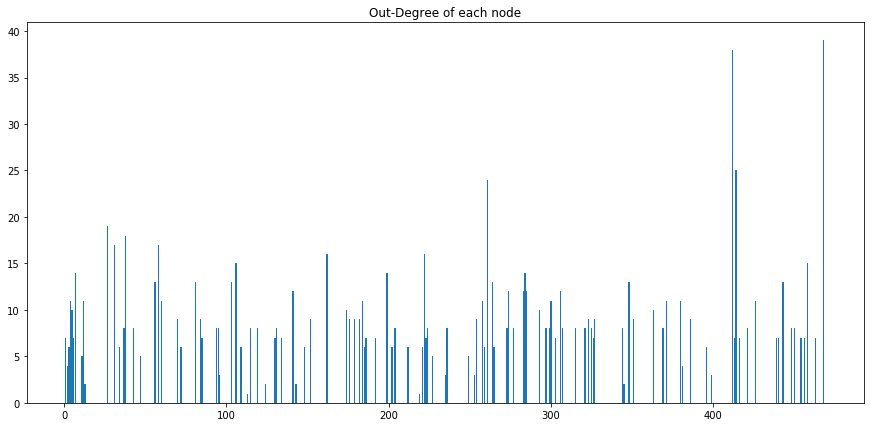

In [69]:
node_list = [i for i in range(1, NUM_OF_G5 + 1)]

plt.figure(figsize=(15, 7))
plt.bar(node_list, ccc)
plt.title('Out-Degree of each node')
plt.show()

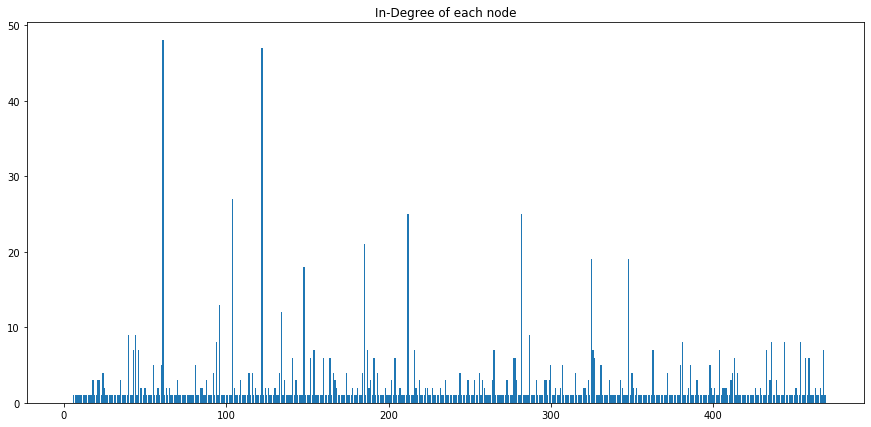

In [70]:
plt.figure(figsize=(15, 7))
plt.bar(node_list, ppp)
plt.title('In-Degree of each node')
plt.show()

### Graph 6
graph6 幾個重要的點如下：

| Node| Hub | Authority | PageRank | Out-Degree| In-Degree|
| --- | --- | --------- | -------- | --------- | -------- |
| 171 | 1.0 | 0.1489    | 0.0002 | 47 | 10
| 761 | 0.0 | 1.0       | 0.0006 | 0 | 68
| 1052| 0.0141 | 0.8092 | 0.0007 | 33 | 89

graph6 當中 hub, authority, PageRank 最大的前 10 點如下所示：

In [71]:
authority, hub = HubsAuthorities(graph6)
np.argsort(-hub)[:10] + 1

array([ 171,  857,  185,   91,   79, 1199,  499,  835,  386,  755])

In [72]:
np.argsort(-authority)[:10] + 1

array([1151,  761,   62,   78,  394,  863, 1123,  501, 1052,  180])

In [73]:
np.argsort(-PageRank(graph6))[:10] + 1

array([1052, 1151,  761,   62,  394,   78,  863, 1123,  501,  180])

In [74]:
authority[760]

1.0

In [75]:
pr = PageRank(graph6)

In [76]:
pr[1051]

0.0007300618431884556

graph6 各點的 Out-Degree, In-Degree 如圖：

In [77]:
_, _, ppp, ccc = GetPC(graph6)

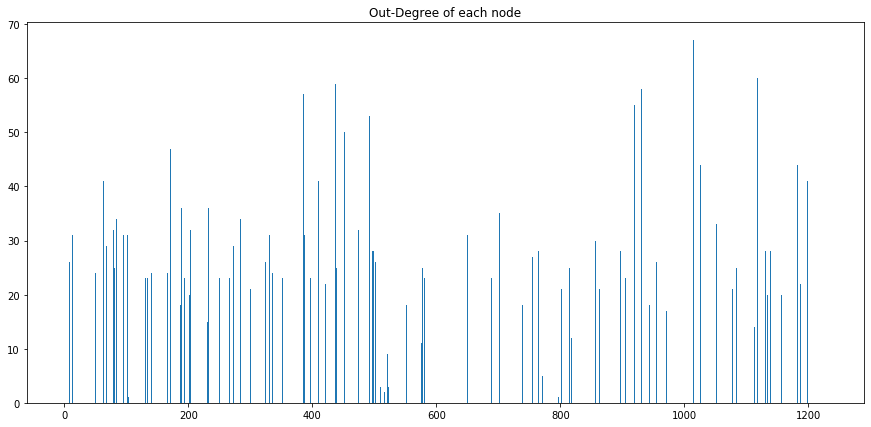

In [78]:
node_list = [i for i in range(1, NUM_OF_G6 + 1)]

plt.figure(figsize=(15, 7))
plt.bar(node_list, ccc)
plt.title('Out-Degree of each node')
plt.show()

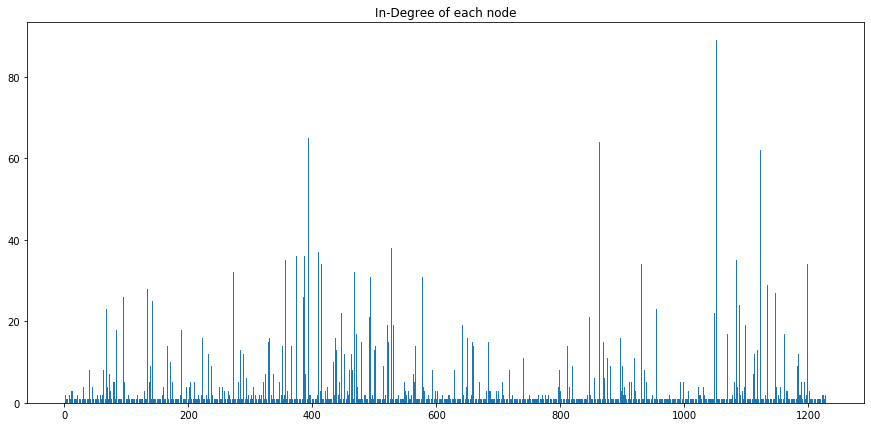

In [79]:
plt.figure(figsize=(15, 7))
plt.bar(node_list, ppp)
plt.title('In-Degree of each node')
plt.show()

In [80]:
tmp_d = { i : c for i, c in zip(range(len(ppp)), ppp) }

In [81]:
tmp_d = { i : c for i, c in zip(range(len(ccc)), ccc) }

In [82]:
tmp_d[1051]

33

### Graph 7
graph7 幾個重要的點如下：

| Node| Hub | Authority | PageRank | Out-Degree| In-Degree|
| --- | --- | --------- | -------- | --------- | -------- |
| 38  | 1.0 | 0.0       | 3e-05    | 11        | 0
| 3186| 0.0 | 1.0       | 0.0034   | 0 | 908
| 2495| 0.0 | 0.2605    | 0.0085   | 0 | 557


graph7 當中 hub, authority, PageRank 最大的前 10 點如下所示：

In [83]:
authority, hub = HubsAuthorities(graph7)
np.argsort(-hub)[:10] + 1

array([ 223, 1060, 1207,   38,  898,  522,  162,  417,  459,  761])

In [84]:
np.argsort(-authority)[:10] + 1

array([3186, 4750, 3159, 2372, 4995, 2315, 2199, 1040, 2495, 2872])

In [85]:
np.argsort(-PageRank(graph7))[:10] + 1

array([2495, 3186, 4750, 3159, 2372, 2315, 1040, 2199, 4995, 2872])

In [86]:
pr = PageRank(graph7)
pr

array([3.0030e-05, 3.0030e-05, 3.0030e-05, ..., 3.0030e-05, 3.0030e-05,
       3.2609e-03])

In [87]:
pr[3185]

0.003422873462431389

graph7 各點的 Out-Degree, In-Degree 如圖：

In [88]:
_, _, ppp, ccc = GetPC(graph7)

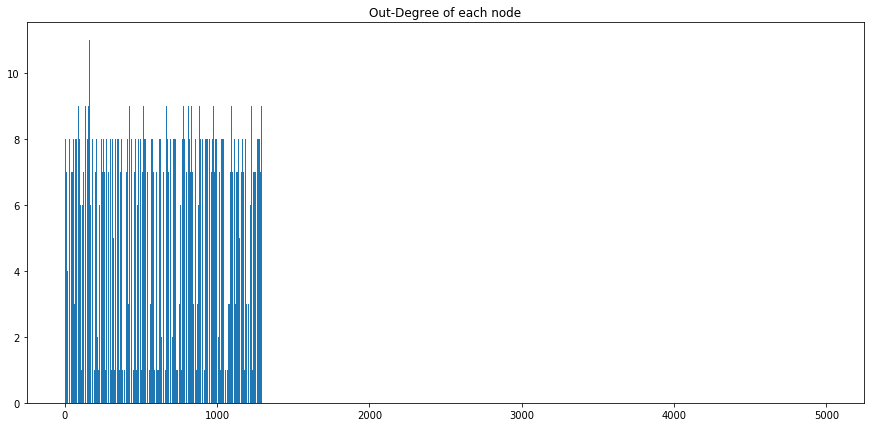

In [89]:
node_list = [i for i in range(1, NUM_OF_G7 + 1)]

plt.figure(figsize=(15, 7))
plt.bar(node_list, ccc)
plt.title('Out-Degree of each node')
plt.show()

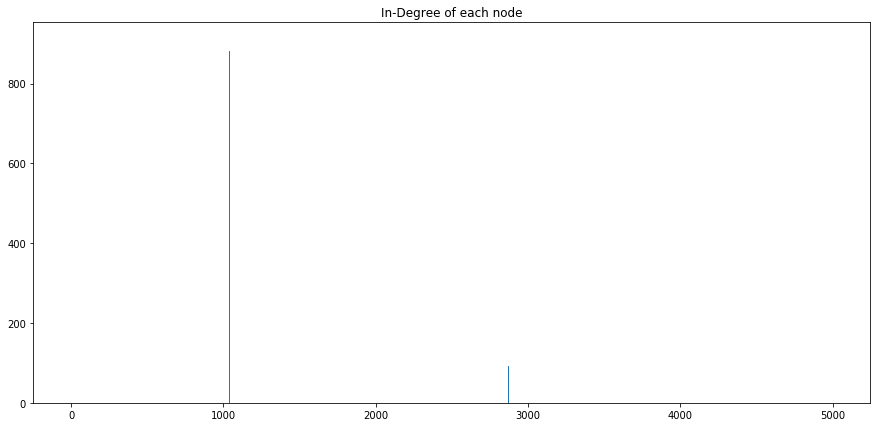

In [90]:
plt.figure(figsize=(15, 7))
plt.bar(node_list, ppp)
plt.title('In-Degree of each node')
plt.show()

In [91]:
tmp_d = { i : c for i, c in zip(range(len(ppp)), ppp) }

In [92]:
tmp_d = { i : c for i, c in zip(range(len(ccc)), ccc) }

In [93]:
tmp_d[3185]

0

## Part 4

You should write a report for your system, including:

* Implementation detail <br/>
    => 如 source code 所示。

* Result analysis and discussion <br/>
    => 如上所示。

* Computation performance analysis <br/>
    => HITS: $O(||V||^2)$, PageRank: $O(||V||^2)$, SimRank: $O(||V||^4)$

* Discussion (what you learned from this project and your comments about this project) <br/>
    => 實際了解到 HITS, PageRank, SimRank 三種 link analysis 的運算過程，並確實觀察到他們迭代運算後收斂的情形。

Questions & Discussion (optional, but recommended)

* More limitations about link analysis algorithms

* Can link analysis algorithms really find the “important” pages from Web? <br/>
    => 有困難度。因為使用者在搜尋網頁時，往往只會下幾個關鍵字，導致很難從不相關的 webpages 中過濾出真正重要的 webpages。
    
* What are practical issues when implement these algorithms in a real Web?
    * Performance discussion (time cost) <br/>
    => transform data into a format that can be effectively used <br/>
    => information overload
    
* What do the result say for your actor/movie graph?

* Any new idea about the link analysis algorithm?

* What is the effect of “C” parameter in SimRank? <br/>
    => C 為 decay factor，介於0到1之間。當 C 愈大時，SimRank 值的精準度會降低，但收斂所需的迭代次數較少；反之，精準度提高，但需要較多的迭代次數才有辦法收斂。
    
* Design a new link-based similarity measurement